**Descriptive Statistic:**

Summarizing the data with the statistical terms.

**Inferential Statistics:**

Making conclusion of the data using statistical terms.

**Sampling Methods:**

Subset of population which represent the characteristics.
There are two types of sampling methods:-

**1. Random Sample:** Selecting each member with an equal chances of the population.

There are 4 methods of Random Sampling Methods:-

1. Simple Random Sample: sample having equal size.
2. Stratified Sample: Collecting sample equally by dividingthe population.
3. Cluster Sample: Dividing the population into groups and then randomly selecting the groups. And from there, take sample. 
4. Systematic Sample: Randomly selecting a point and taking every data from a listing of the population. 

**2. Non Random Sample:** Selecting unequally from the population.

**Statistical data:**

Collection of data related to the domain problem. Obtained by counting or measuring items.There are 2 types:-

Primary data: Collecting data by surveys , questionaires and all.
Secondary data : Available of dataset which has already compiled.

There are 2 types of data:

1. Qualitative data: Based on categorial 
2. Quantitative data: based on numerical 


Types of levels of measurement:

1. Nominal: Categorical data without any numerical meaning, such as colors or categories.
2. Ordinal: Categorical data with a meaningful order but without a consistent interval, such as rating scales or ranks.
3. Interval: Numerical data with a consistent interval between values but without a meaningful zero point.
4. Ratio: Numerical data with a consistent interval between values and a meaningful zero point, allowing for ratios and comparisons, such as heights or weights.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [41]:
df=pd.read_csv("Scent_Sales_messy.csv")

In [42]:
df.head()

,Sale Date,Order ID,Sale Value,Product Name,Store Name,Region,Scent Name,Store Manager
0,12/12/2022 00:00:00,937,109.84,Liquid - 25ml,Lewisham,East,"""Rose""",NaN
1,14/10/2022 00:00:00,427,207.61,Liquid - 25ml,Lewisham,East,"""Rose""",NaN
2,09/09/2022 00:00:00,135,111.96,Liquid - 25ml,Lewisham,East,"""Rose""",NaN
3,11/12/2022 00:00:00,791,170.68,Liquid - 25ml,Wimbledon,West,"""Rose""",NaN
4,08/09/2022 00:00:00,270,214.12,Liquid - 25ml,Wimbledon,West,"""Rose""",NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4063 entries, 0 to 4062
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sale Date      4063 non-null   object 
 1   Order ID       4063 non-null   int64  
 2   Sale Value     4063 non-null   float64
 3   Product Name   4063 non-null   object 
 4   Store Name     4063 non-null   object 
 5   Region         4063 non-null   object 
 6   Scent Name     4063 non-null   object 
 7   Store Manager  0 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 254.1+ KB


In [44]:
df.isnull().sum()

Sale Date           0
Order ID            0
Sale Value          0
Product Name        0
Store Name          0
Region              0
Scent Name          0
Store Manager    4063
dtype: int64

In [45]:
df.describe()

,Order ID,Sale Value,Store Manager
count,4063.000000,4063.000000,0.0
mean,499.656412,151.397832,NaN
std,289.355602,85.455798,NaN
min,1.000000,3.530000,NaN
25%,248.000000,75.500000,NaN
50%,497.000000,153.490000,NaN
75%,753.000000,222.285000,NaN
max,999.000000,299.960000,NaN


In [46]:
df["Sale Value"].var()

7302.693399162174

In [47]:
df["Sale Value"].std()

85.45579792595804

In [48]:
df[["Product Name", "Store Name" ,"Region","Scent Name"]].mode()

,Product Name,Store Name,Region,Scent Name
0,Liquid - 750ml,Lewisham,East,"""Strawberry"""


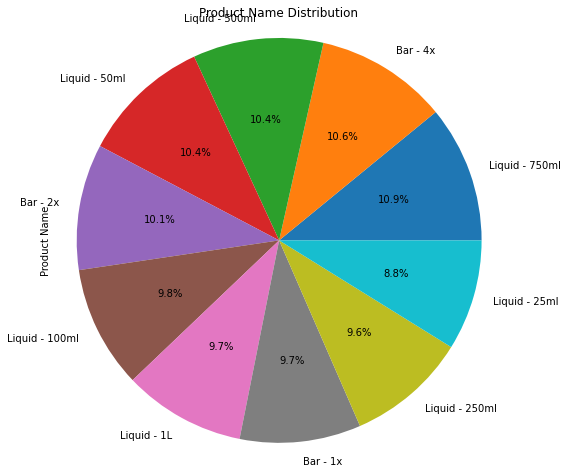

In [78]:
plt.figure(figsize=(8, 8))
df["Product Name"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis('equal')
plt.title("Product Name Distribution")
plt.show()

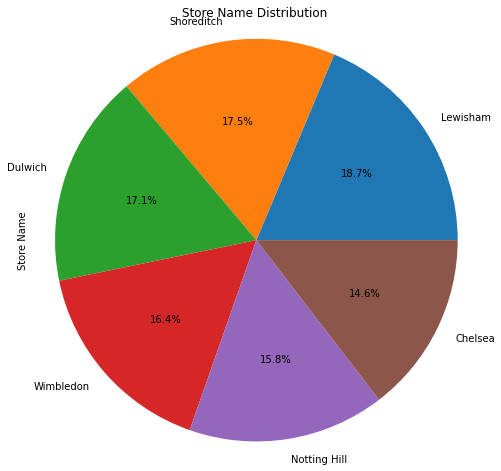

In [79]:
plt.figure(figsize=(8, 8))
df["Store Name"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis('equal')
plt.title("Store Name Distribution")
plt.show()

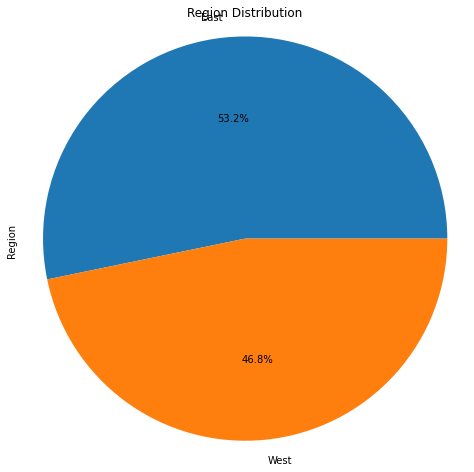

In [80]:
plt.figure(figsize=(8, 8))
df["Region"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis('equal')
plt.title("Region Distribution")
plt.show()

C:\Users\celvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


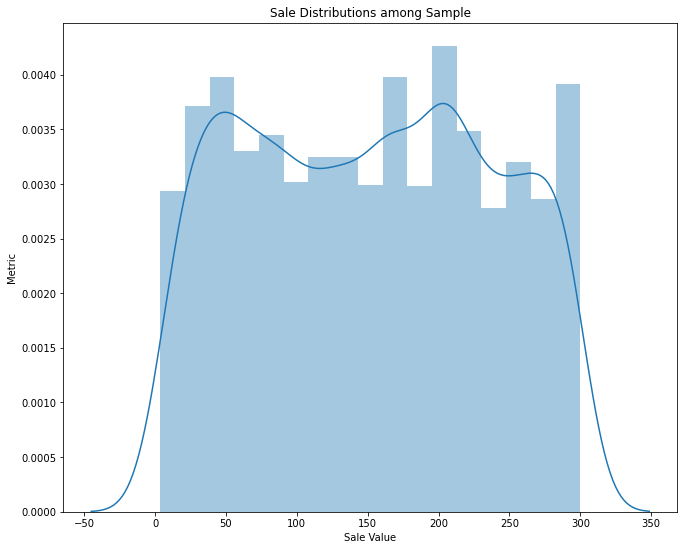

In [71]:
f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Sale Distributions among Sample' )  
plt.ylabel( 'Metric' )  
sns.distplot( df['Sale Value'])  
plt.show()  

In [64]:
# T-test or ANOVA test
group1 = df[df["Store Name"] == "Dulwich"]["Sale Value"]
group2 = df[df["Region"] == "West"]["Sale Value"]

In [65]:
# T-test
t_stat, p_value = ttest_ind(group1, group2)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.5359757888611933
P-Value: 0.5920212723188737


Since the p-value (0.592) is greater than the commonly used significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis. The null hypothesis assumes that there is no significant difference in the "Sale Value" between the two groups.

Therefore, based on the results of the t-test, we cannot conclude that there is a significant difference in the "Sale Value" between the "Dulwich" store and the "West" region.

In [66]:
# ANOVA test
f_stat, p_value = f_oneway(group1, group2)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 0.2872700462453853
P-Value: 0.5920212723186044


Since the p-value (0.592) is greater than the commonly used significance level of 0.05, we do not have sufficient evidence to reject the null hypothesis. The null hypothesis assumes that there is no significant difference in the "Sale Value" among the groups.

Therefore, based on the results of the ANOVA test, we cannot conclude that there is a significant difference in the "Sale Value" between the "Dulwich" store and the "West" region.